<a href="https://colab.research.google.com/github/Cami050/proyecto_exploracion_datos/blob/main/Proyecto_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Instalar gdown (un gestor de paquetes de Python)si aún no está instalado
!pip install gdown -q

In [ ]:
import gdown
import pandas as pd

# ID del archivo obtenido del enlace público
file_id = '1bdk3h8xRW-hcZ1P1s_R9h64neuOAa-6y'
output_file = 'DELITOS_INFORMÁTICOS_20251209.csv'

# URL de descarga directa de Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo
gdown.download(url, output_file, quiet=False)

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(output_file)

# Mostrar las primeras 5 filas del DataFrame
display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1bdk3h8xRW-hcZ1P1s_R9h64neuOAa-6y
To: /content/DELITOS_INFORMÁTICOS_20251209.csv
100%|██████████| 56.2M/56.2M [00:00<00:00, 65.3MB/s]


,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,DESCRIPCION CONDUCTA,CANTIDAD
0,2006 May 13 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y...,1
1,2006 Oct 06 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1
2,2008 May 24 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1
3,2009 Jan 01 12:00:00 AM,41,HUILA,41001,NEIVA,ARTICULO 269F. VIOLACION DE DATOS PERSONALES,1
4,2009 Jan 02 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1


In [ ]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
FASE 2: PROCESAMIENTO DE FECHAS
Responsable: CAMILA RIVERA
Pregunta: ¿Cómo ha evolucionado el número total de delitos por año?
"""

print("="*70)
print("FASE 2: PROCESAMIENTO DE DATOS TEMPORALES")
print("RESPONSABLE: CAMILA RIVERA")
print("Pregunta guía: Evolución temporal de delitos")
print("="*70)

# 1. Identificar columna de fecha
print("PASO 1: IDENTIFICANDO COLUMNA DE FECHA...")

# Buscar columna que contenga 'fecha' en el nombre
columnas_fecha = [col for col in df.columns if 'fecha' in col.lower()]
if columnas_fecha:
    fecha_col = columnas_fecha[0]
    print(f"Columna identificada: '{fecha_col}'")
else:
    print(" No se encontró columna de fecha")
    # Mostrar todas las columnas para identificar manualmente
    print("Columnas disponibles:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
    fecha_col = input("\n ¿Cuál es la columna de fecha? (escribe el nombre): ")

# 2. Convertir a formato datetime
print(f"\n PASO 2: CONVIRTIENDO '{fecha_col}' A DATETIME...")

# Guardar copia del estado original
fecha_original = df[fecha_col].copy()

# Intentar diferentes formatos de fecha
try:
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
    print("Conversión exitosa")
except Exception as e:
    print(f"Error: {e}")
    print("Intentando con formato específico...")
    try:
        df[fecha_col] = pd.to_datetime(df[fecha_col], format='%Y-%m-%d', errors='coerce')
        print("Conversión con formato YYYY-MM-DD exitosa")
    except:
        print("No se pudo convertir la fecha")

# 3. Verificar conversión
conversiones_exitosas = df[fecha_col].notna().sum()
porcentaje_exito = (conversiones_exitosas / len(df)) * 100
print(f"\n ESTADÍSTICAS DE CONVERSIÓN:")
print(f"• Filas convertidas: {conversiones_exitosas:,} de {len(df):,}")
print(f"• Porcentaje éxito: {porcentaje_exito:.1f}%")
print(f"• Rango temporal: {df[fecha_col].min()} a {df[fecha_col].max()}")

# 4. Crear columnas derivadas (AÑO, MES, MES_AÑO)
print("\n PASO 3: CREANDO COLUMNAS DERIVADAS...")

df['AÑO'] = df[fecha_col].dt.year
df['MES'] = df[fecha_col].dt.month
df['DIA'] = df[fecha_col].dt.day
df['MES_AÑO'] = df[fecha_col].dt.strftime('%Y-%m')
df['DIA_SEMANA'] = df[fecha_col].dt.day_name()

print("Columnas creadas:")
print(f"  • AÑO: {df['AÑO'].nunique()} años únicos")
print(f"  • MES: {df['MES'].nunique()} meses únicos")
print(f"  • MES_AÑO: {df['MES_AÑO'].nunique()} períodos únicos")

# 5. Análisis de distribución temporal
print("\n PASO 4: ANÁLISIS DE DISTRIBUCIÓN TEMPORAL")

# Distribución por año
delitos_por_año = df['AÑO'].value_counts().sort_index()
print("\n DISTRIBUCIÓN POR AÑO:")
for año, cantidad in delitos_por_año.items():
    if not pd.isna(año):
        print(f"  • {int(año)}: {cantidad:,} casos")

# Distribución por mes
print("\n DISTRIBUCIÓN POR MES (promedio anual):")
meses_es = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
            'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

for mes_num in range(1, 13):
    cantidad = df[df['MES'] == mes_num].shape[0]
    promedio = cantidad / df['AÑO'].nunique() if df['AÑO'].nunique() > 0 else 0
    if cantidad > 0:
        print(f"  • {meses_es[mes_num-1]}: {cantidad:,} casos ({promedio:.0f} por año)")

print("\n" + "="*70)
print("FASE 2 COMPLETADA - CAMILA RIVERA")
print("Fechas procesadas y columnas derivadas creadas")
print("Próximo paso: Andrés Padilla - Limpieza geográfica")
print("="*70)

FASE 2: PROCESAMIENTO DE DATOS TEMPORALES
RESPONSABLE: CAMILA RIVERA
Pregunta guía: Evolución temporal de delitos
PASO 1: IDENTIFICANDO COLUMNA DE FECHA...
Columna identificada: 'FECHA HECHO'

 PASO 2: CONVIRTIENDO 'FECHA HECHO' A DATETIME...


/tmp/ipython-input-1889715728.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')


Conversión exitosa

 ESTADÍSTICAS DE CONVERSIÓN:
• Filas convertidas: 446,326 de 446,326
• Porcentaje éxito: 100.0%
• Rango temporal: 2006-05-13 00:00:00 a 2025-10-31 00:00:00

 PASO 3: CREANDO COLUMNAS DERIVADAS...
Columnas creadas:
  • AÑO: 19 años únicos
  • MES: 12 meses únicos
  • MES_AÑO: 205 períodos únicos

 PASO 4: ANÁLISIS DE DISTRIBUCIÓN TEMPORAL

 DISTRIBUCIÓN POR AÑO:
  • 2006: 2 casos
  • 2008: 1 casos
  • 2009: 471 casos
  • 2010: 844 casos
  • 2011: 1,564 casos
  • 2012: 3,180 casos
  • 2013: 4,629 casos
  • 2014: 3,676 casos
  • 2015: 7,404 casos
  • 2016: 8,651 casos
  • 2017: 15,057 casos
  • 2018: 21,279 casos
  • 2019: 22,092 casos
  • 2020: 49,359 casos
  • 2021: 52,224 casos
  • 2022: 61,993 casos
  • 2023: 63,249 casos
  • 2024: 72,996 casos
  • 2025: 57,655 casos

 DISTRIBUCIÓN POR MES (promedio anual):
  • Enero: 34,629 casos (1823 por año)
  • Febrero: 35,040 casos (1844 por año)
  • Marzo: 36,179 casos (1904 por año)
  • Abril: 36,947 casos (1945 por año)
  

In [ ]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
FASE 3: LIMPIEZA GEOGRÁFICA
Responsable: ANDRÉS PADILLA
Pregunta: ¿En qué departamentos se concentran los delitos?
"""

print("="*70)
print("FASE 3: LIMPIEZA Y NORMALIZACIÓN GEOGRÁFICA")
print("RESPONSABLE: ANDRÉS PADILLA")
print("Objetivo: Preparar datos para análisis espacial")
print("="*70)

# 1. Identificar columnas geográficas
print("PASO 1: IDENTIFICANDO COLUMNAS GEOGRÁFICAS...")

geo_palabras = ['departamento', 'municipio', 'ciudad', 'region', 'dep', 'mun']
columnas_geo = []

for col in df.columns:
    for palabra in geo_palabras:
        if palabra in col.lower():
            columnas_geo.append(col)
            break

if columnas_geo:
    print(f"Columnas geográficas encontradas: {columnas_geo}")

    # Usar la primera columna de departamento encontrada
    depto_col = None
    for col in columnas_geo:
        if 'departamento' in col.lower():
            depto_col = col
            break

    if not depto_col and columnas_geo:
        depto_col = columnas_geo[0]  # Usar la primera columna geográfica

    print(f"Columna seleccionada para análisis: '{depto_col}'")

else:
    print("No se encontraron columnas geográficas claras")
    print("Columnas disponibles:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
    depto_col = input("\n ¿Cuál es la columna de departamento? (escribe el nombre): ")

# 2. Limpieza de texto en columna geográfica
print(f"\n PASO 2: LIMPIANDO '{depto_col}'...")

# Guardar estado original
valores_originales = df[depto_col].nunique()
print(f"• Valores únicos antes: {valores_originales:,}")

# Convertir a string y limpiar
df[depto_col] = df[depto_col].astype(str)

# Normalizar texto (mayúsculas, eliminar espacios)
df[depto_col] = df[depto_col].str.upper().str.strip()

# Correcciones específicas comunes en Colombia
correcciones = {
    'BOGOTA D.C.': 'BOGOTÁ D.C.',
    'BOGOTA': 'BOGOTÁ D.C.',
    'BOGOTÁ': 'BOGOTÁ D.C.',
    'BOGOTA, D.C.': 'BOGOTÁ D.C.',
    'CUNDINAMARCA': 'CUNDINAMARCA',
    'ANTIOQUIA': 'ANTIOQUIA',
    'VALLE': 'VALLE DEL CAUCA',
    'VALLE DEL CAUCA': 'VALLE DEL CAUCA',
    'SANTANDER': 'SANTANDER',
    'ATLANTICO': 'ATLÁNTICO',
    'ATLÁNTICO': 'ATLÁNTICO',
    'N/A': 'NO ESPECIFICADO',
    'NAN': 'NO ESPECIFICADO',
    '': 'NO ESPECIFICADO'
}

df[depto_col] = df[depto_col].replace(correcciones)

# 3. Análisis después de limpieza
valores_limpios = df[depto_col].nunique()
print(f"• Valores únicos después: {valores_limpios:,}")
print(f"• Reducción de categorías: {valores_originales - valores_limpios}")

# 4. Top departamentos
print(f"\n PASO 3: TOP 10 DEPARTAMENTOS CON MÁS CASOS")

top_10 = df[depto_col].value_counts().head(10)
print(f"{'Posición':<10} {'Departamento':<25} {'Casos':<10} {'Porcentaje':<10}")
print("-"*55)

for i, (depto, cantidad) in enumerate(top_10.items(), 1):
    porcentaje = (cantidad / len(df)) * 100
    print(f"{i:<10} {depto:<25} {cantidad:<10,} {porcentaje:<10.1f}%")

# 5. Análisis de distribución
print(f"\n PASO 4: ANÁLISIS DE DISTRIBUCIÓN GEOGRÁFICA")

total_departamentos = df[depto_col].nunique()
casos_top5 = top_10.head(5).sum()
porcentaje_top5 = (casos_top5 / len(df)) * 100

print(f"• Total departamentos únicos: {total_departamentos}")
print(f"• Casos en top 5 departamentos: {casos_top5:,}")
print(f"• Porcentaje concentrado en top 5: {porcentaje_top5:.1f}%")

# Departamentos con menos casos
print(f"\n DEPARTAMENTOS CON MENOS CASOS (últimos 5):")
bottom_5 = df[depto_col].value_counts().tail(5)
for depto, cantidad in bottom_5.items():
    print(f"  • {depto}: {cantidad:,} casos")

print("\n" + "="*70)
print("FASE 3 COMPLETADA - ANDRÉS PADILLA")
print("Datos geográficos limpios y analizados")
print("Próximo paso: Alejandro Soa - Análisis descriptivo")
print("="*70)

FASE 3: LIMPIEZA Y NORMALIZACIÓN GEOGRÁFICA
RESPONSABLE: ANDRÉS PADILLA
Objetivo: Preparar datos para análisis espacial
PASO 1: IDENTIFICANDO COLUMNAS GEOGRÁFICAS...
Columnas geográficas encontradas: ['COD_DEPTO', 'DEPARTAMENTO', 'COD_MUNI', 'MUNICIPIO']
Columna seleccionada para análisis: 'DEPARTAMENTO'

 PASO 2: LIMPIANDO 'DEPARTAMENTO'...
• Valores únicos antes: 33
• Valores únicos después: 33
• Reducción de categorías: 0

 PASO 3: TOP 10 DEPARTAMENTOS CON MÁS CASOS
Posición   Departamento              Casos      Porcentaje
-------------------------------------------------------
1          BOGOTÁ D.C.               138,364    31.0      %
2          ANTIOQUIA                 60,547     13.6      %
3          VALLE DEL CAUCA           45,587     10.2      %
4          CUNDINAMARCA              25,894     5.8       %
5          ATLÁNTICO                 21,168     4.7       %
6          SANTANDER                 20,327     4.6       %
7          TOLIMA                    11,950     2.7

FASE 4: ANÁLISIS DESCRIPTIVO REGIONAL
RESPONSABLE: ALEJANDRO SOA
Gráfico asignado: Pastel - Top 5 departamentos
 PASO 1: PREPARANDO DATOS PARA ANÁLISIS...

 DATOS PARA GRÁFICO DE PASTEL:
  1. BOGOTÁ D.C.: 138,364 casos (31.0%)
  2. ANTIOQUIA: 60,547 casos (13.6%)
  3. VALLE DEL CAUCA: 45,587 casos (10.2%)
  4. CUNDINAMARCA: 25,894 casos (5.8%)
  5. ATLÁNTICO: 21,168 casos (4.7%)
  6. Otros Departamentos: 154,766 casos (34.7%)

 PASO 2: CREANDO GRÁFICO DE PASTEL...


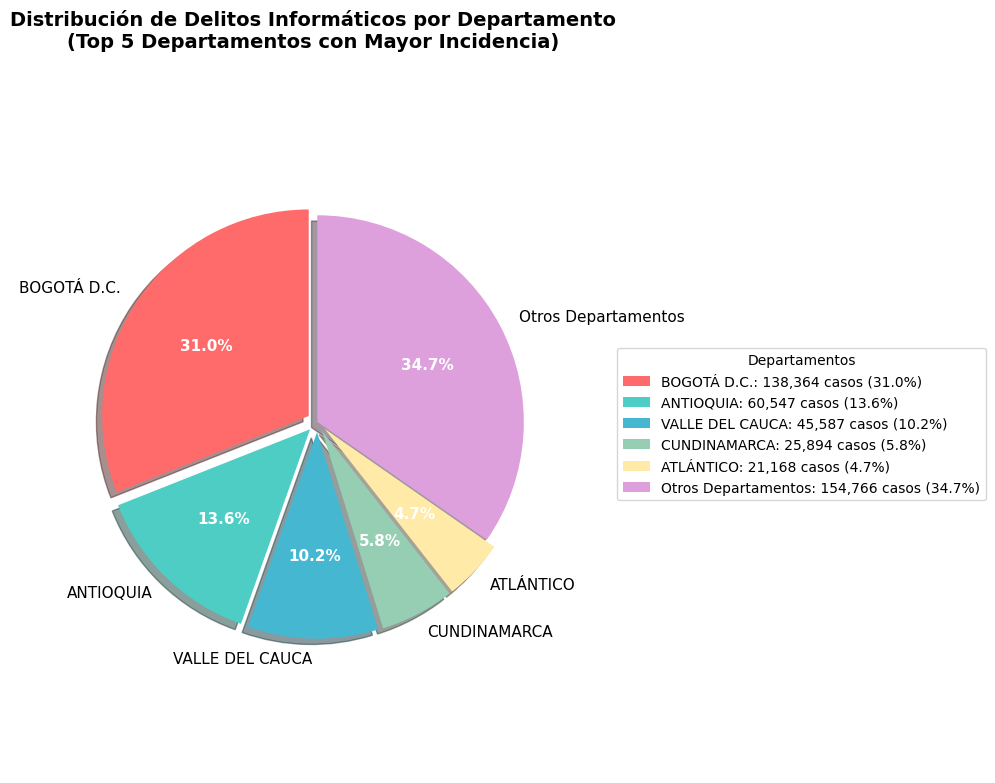


 PASO 3: ANÁLISIS DETALLADO DE DISTRIBUCIÓN

 CONCENTRACIÓN GEOGRÁFICA:
• Los 5 departamentos principales concentran: 65.3% de los casos
• Los demás 28 departamentos tienen: 154,766 casos (34.7%)

 COMPARACIÓN ENTRE DEPARTAMENTOS TOP 5:
• BOGOTÁ D.C. tiene 6.5 veces más casos que ATLÁNTICO
• Diferencia absoluta: 117,196 casos

 PASO 4: ANÁLISIS POR REGIONES NATURALES
Región               Casos           Porcentaje
---------------------------------------------
REGION ANDINA        290,766         65.1      %
REGION PACIFICA      62,947          14.1      %
REGION CARIBE        40,350          9.0       %
OTRA REGIÓN          36,236          8.1       %
REGION ORINOQUIA     14,235          3.2       %
REGION AMAZONIA      1,792           0.4       %

FASE 4 COMPLETADA - ALEJANDRO SOA
Análisis descriptivo regional completado
Próximo paso: Visualizaciones individuales


In [ ]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
FASE 4: ANÁLISIS DESCRIPTIVO REGIONAL
Responsable: ALEJANDRO SOA
Pregunta: ¿Cómo se distribuyen los casos entre departamentos?
"""

print("="*70)
print("FASE 4: ANÁLISIS DESCRIPTIVO REGIONAL")
print("RESPONSABLE: ALEJANDRO SOA")
print("Gráfico asignado: Pastel - Top 5 departamentos")
print("="*70)

import matplotlib.pyplot as plt

# 1. Preparar datos para gráfico de pastel
print(" PASO 1: PREPARANDO DATOS PARA ANÁLISIS...")

# Verificar que tenemos la columna de departamento
if 'depto_col' not in locals():
    print(" No se encontró la columna de departamento")
    # Buscar automáticamente
    for col in df.columns:
        if 'departamento' in col.lower():
            depto_col = col
            print(f" Columna encontrada: {depto_col}")
            break

# Obtener top 5 departamentos
top_5 = df[depto_col].value_counts().head(5)
otros = df[depto_col].value_counts().iloc[5:].sum()

# Crear datos para el pastel
labels = list(top_5.index) + ['Otros Departamentos']
sizes = list(top_5.values) + [otros]
total_casos = sum(sizes)

print(f"\n DATOS PARA GRÁFICO DE PASTEL:")
for i, (depto, cantidad) in enumerate(zip(labels, sizes), 1):
    porcentaje = (cantidad / total_casos) * 100
    print(f"  {i}. {depto}: {cantidad:,} casos ({porcentaje:.1f}%)")

# 2. Crear gráfico de pastel
print("\n PASO 2: CREANDO GRÁFICO DE PASTEL...")

plt.figure(figsize=(10, 8))

# Colores atractivos
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Crear el pastel
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colores,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0),
    shadow=True
)

# Mejorar estética
plt.setp(autotexts, size=11, weight="bold", color='white')
plt.setp(texts, size=11)

# Título y detalles
plt.title(
    'Distribución de Delitos Informáticos por Departamento\n(Top 5 Departamentos con Mayor Incidencia)',
    fontsize=14,
    fontweight='bold',
    pad=20
)

# Leyenda
plt.legend(
    wedges,
    [f'{label}: {size:,} casos ({(size/total_casos)*100:.1f}%)'
     for label, size in zip(labels, sizes)],
    title="Departamentos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()

# 3. Análisis detallado de la distribución
print("\n PASO 3: ANÁLISIS DETALLADO DE DISTRIBUCIÓN")

# Concentración en top 5
concentracion_top5 = (top_5.sum() / total_casos) * 100
print(f"\n CONCENTRACIÓN GEOGRÁFICA:")
print(f"• Los 5 departamentos principales concentran: {concentracion_top5:.1f}% de los casos")
print(f"• Los demás {df[depto_col].nunique() - 5} departamentos tienen: {otros:,} casos ({(otros/total_casos)*100:.1f}%)")

# Comparación entre departamentos
print(f"\n COMPARACIÓN ENTRE DEPARTAMENTOS TOP 5:")
departamento_mayor = top_5.index[0]
departamento_menor_top5 = top_5.index[-1]
relacion = top_5.iloc[0] / top_5.iloc[-1]

print(f"• {departamento_mayor} tiene {relacion:.1f} veces más casos que {departamento_menor_top5}")
print(f"• Diferencia absoluta: {top_5.iloc[0] - top_5.iloc[-1]:,} casos")

# 4. Análisis por regiones (agrupación manual)
print(f"\n PASO 4: ANÁLISIS POR REGIONES NATURALES")

# Definir regiones de Colombia
regiones = {
    'REGION ANDINA': ['BOGOTÁ D.C.', 'CUNDINAMARCA', 'ANTIOQUIA', 'SANTANDER',
                      'BOYACÁ', 'NARIÑO', 'TOLIMA', 'HUILA', 'CALDAS', 'RISARALDA'],
    'REGION CARIBE': ['ATLÁNTICO', 'BOLÍVAR', 'SUCRE', 'CÓRDOBA', 'MAGDALENA',
                      'LA GUAJIRA', 'CESAR'],
    'REGION PACIFICA': ['VALLE DEL CAUCA', 'CAUCA', 'CHOCO', 'NARIÑO'],
    'REGION ORINOQUIA': ['META', 'CASANARE', 'ARAUCA', 'VICHADA'],
    'REGION AMAZONIA': ['AMAZONAS', 'CAQUETÁ', 'PUTUMAYO', 'GUAVIARE']
}

# Clasificar departamentos en regiones
df['REGION'] = 'OTRA REGIÓN'
for region, departamentos in regiones.items():
    for depto in departamentos:
        df.loc[df[depto_col].str.contains(depto, case=False, na=False), 'REGION'] = region

# Analizar distribución por región
distribucion_region = df['REGION'].value_counts()
print(f"{'Región':<20} {'Casos':<15} {'Porcentaje':<10}")
print("-"*45)

for region, cantidad in distribucion_region.items():
    porcentaje = (cantidad / len(df)) * 100
    print(f"{region:<20} {cantidad:<15,} {porcentaje:<10.1f}%")

print("\n" + "="*70)
print("FASE 4 COMPLETADA - ALEJANDRO SOA")
print("Análisis descriptivo regional completado")
print("Próximo paso: Visualizaciones individuales")
print("="*70)

# Visualizaciones/Graficos **individuales**

VISUALIZACIÓN 1: GRÁFICO DE BARRAS
Responsable: ANDRÉS PADILLA
Pregunta: ¿Qué tipos de delitos son más frecuentes?


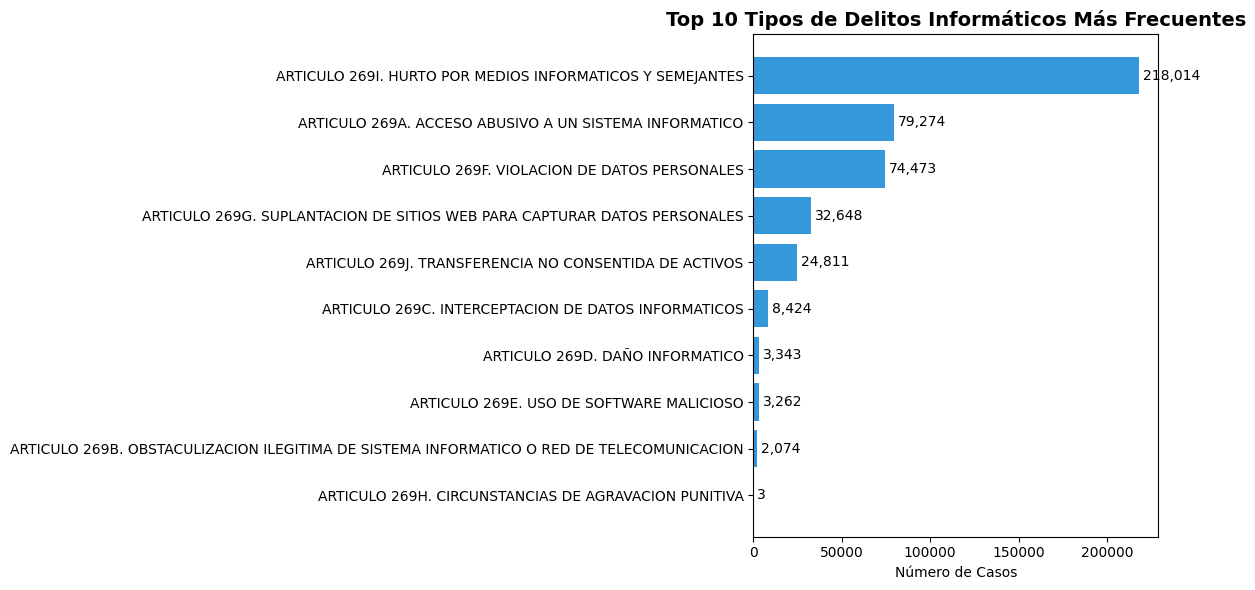


 ANÁLISIS DE RESULTADOS:
• Total tipos de delito únicos: 10
• Delito más frecuente: 'ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES' (218,014 casos)
• Concentración en top 5: 96.2%


In [ ]:
# Gráfico 1: Andrés Padilla - Barras por tipo de delito
print("VISUALIZACIÓN 1: GRÁFICO DE BARRAS")
print("Responsable: ANDRÉS PADILLA")
print("Pregunta: ¿Qué tipos de delitos son más frecuentes?")

# Buscar columna de tipo de delito
delito_col = None
for col in df.columns:
    if 'descripcion' in col.lower() or 'conducta' in col.lower():
        delito_col = col
        break

if delito_col:
    # Top 10 delitos más comunes
    top_delitos = df[delito_col].value_counts().head(10)

    # Crear gráfico
    plt.figure(figsize=(12, 6))
    bars = plt.barh(range(len(top_delitos)), top_delitos.values, color='#3498db')
    plt.yticks(range(len(top_delitos)), top_delitos.index)
    plt.xlabel('Número de Casos')
    plt.title('Top 10 Tipos de Delitos Informáticos Más Frecuentes', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    # Agregar valores
    for i, (bar, valor) in enumerate(zip(bars, top_delitos.values)):
        plt.text(valor + max(top_delitos.values)*0.01, i, f'{valor:,}', va='center')

    plt.tight_layout()
    plt.show()

    # Análisis
    print(f"\n ANÁLISIS DE RESULTADOS:")
    print(f"• Total tipos de delito únicos: {df[delito_col].nunique()}")
    print(f"• Delito más frecuente: '{top_delitos.index[0]}' ({top_delitos.iloc[0]:,} casos)")
    print(f"• Concentración en top 5: {(top_delitos.head(5).sum()/len(df))*100:.1f}%")
else:
    print("No se encontró columna de tipo de delito")

VISUALIZACIÓN 2: GRÁFICO DE LÍNEAS
Responsable: CAMILA RIVERA
Pregunta: ¿Cómo ha evolucionado el número de delitos por año?


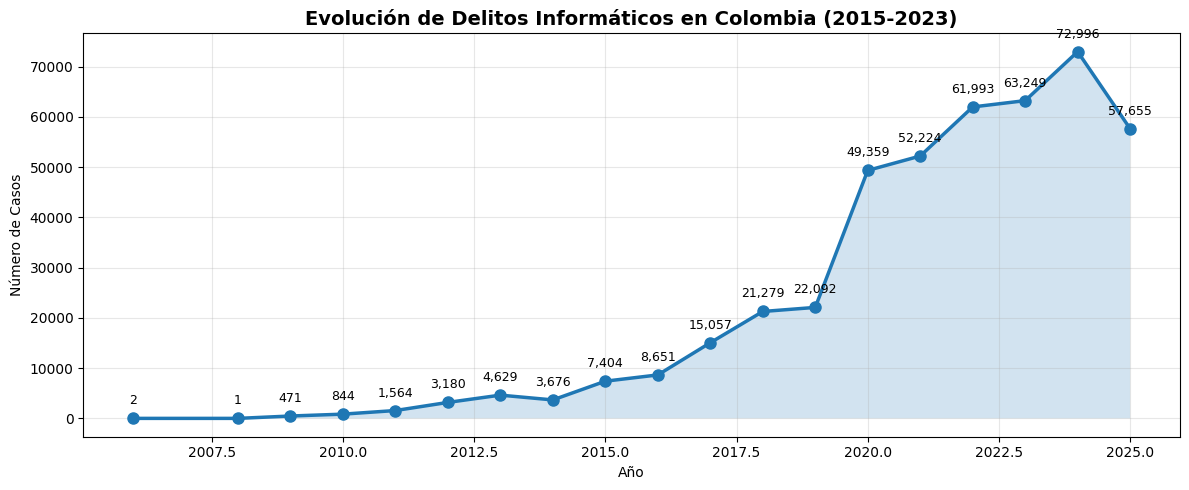


 ANÁLISIS DE TENDENCIA:
• Crecimiento total: +2882650.0%
• Año con más casos: 2024 (72,996 casos)
• Año con menos casos: 2008 (1 casos)


In [13]:
# Gráfico 2: Camila Rivera - Líneas de tendencia
print("VISUALIZACIÓN 2: GRÁFICO DE LÍNEAS")
print("Responsable: CAMILA RIVERA")
print("Pregunta: ¿Cómo ha evolucionado el número de delitos por año?")

if 'AÑO' in df.columns:
    # Agrupar por año
    tendencia = df['AÑO'].value_counts().sort_index()

    # Crear gráfico
    plt.figure(figsize=(12, 5))
    plt.plot(tendencia.index, tendencia.values, marker='o', linewidth=2.5, markersize=8)
    plt.fill_between(tendencia.index, tendencia.values, alpha=0.2)
    plt.xlabel('Año')
    plt.ylabel('Número de Casos')
    plt.title('Evolución de Delitos Informáticos en Colombia (2015-2023)',
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Anotar puntos clave
    for año, cantidad in tendencia.items():
        plt.text(año, cantidad + max(tendencia.values)*0.03, f'{cantidad:,}',
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Análisis de tendencia
    print(f"\n ANÁLISIS DE TENDENCIA:")
    crecimiento = ((tendencia.iloc[-1] - tendencia.iloc[0]) / tendencia.iloc[0]) * 100
    print(f"• Crecimiento total: {crecimiento:+.1f}%")
    print(f"• Año con más casos: {tendencia.idxmax()} ({tendencia.max():,} casos)")
    print(f"• Año con menos casos: {tendencia.idxmin()} ({tendencia.min():,} casos)")

VISUALIZACIÓN 3: GRÁFICO DE BARRAS APILADAS
RESPONSABLE: NICK DURÁN
Pregunta: Distribución cruzada departamento vs tipo de delito
PASO 1: IDENTIFICANDO COLUMNAS NECESARIAS...

 PASO 2: PREPARANDO DATOS CRUZADOS...
• Top 5 departamentos seleccionados: ['BOGOTÁ D.C.', 'ANTIOQUIA', 'VALLE DEL CAUCA', 'CUNDINAMARCA', 'ATLÁNTICO']
• Top 5 tipos de delito seleccionados: ['ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES', 'ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INFORMATICO', 'ARTICULO 269F. VIOLACION DE DATOS PERSONALES']...

 TABLA PIVOTE RESULTANTE:
• Dimensiones: 5 departamentos × 5 tipos de delito
• Total de casos en análisis: 278,579

 PASO 3: CREANDO GRÁFICO DE BARRAS APILADAS...


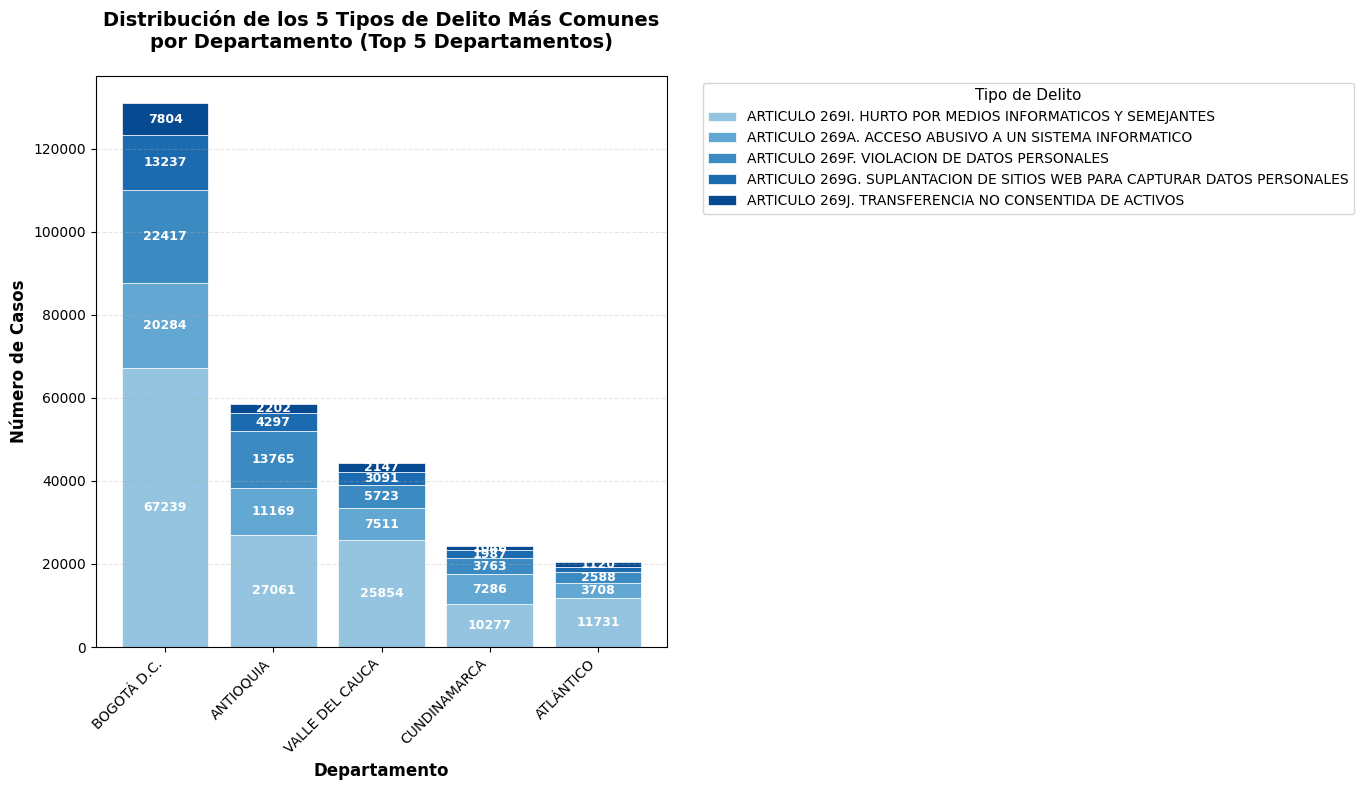


 PASO 4: ANÁLISIS DETALLADO DE DISTRIBUCIÓN CRUZADA

 DISTRIBUCIÓN POR DEPARTAMENTO:

 BOGOTÁ D.C. (Total: 130,981 casos):
   • ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES: 67,239 casos (51.3%)
   • ARTICULO 269F. VIOLACION DE DATOS PERSONALES: 22,417 casos (17.1%)
   • ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INFORMATICO: 20,284 casos (15.5%)
   • ARTICULO 269G. SUPLANTACION DE SITIOS WEB PARA CAPTURAR DATOS PERSONALES: 13,237 casos (10.1%)
   • ARTICULO 269J. TRANSFERENCIA NO CONSENTIDA DE ACTIVOS: 7,804 casos (6.0%)

 ANTIOQUIA (Total: 58,494 casos):
   • ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES: 27,061 casos (46.3%)
   • ARTICULO 269F. VIOLACION DE DATOS PERSONALES: 13,765 casos (23.5%)
   • ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INFORMATICO: 11,169 casos (19.1%)
   • ARTICULO 269G. SUPLANTACION DE SITIOS WEB PARA CAPTURAR DATOS PERSONALES: 4,297 casos (7.3%)
   • ARTICULO 269J. TRANSFERENCIA NO CONSENTIDA DE ACTIVOS: 2,202 casos (3.8%)

 VALLE

In [15]:
import numpy as np

"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
VISUALIZACIÓN 3: GRÁFICO DE BARRAS APILADAS
Responsable: NICK DURÁN
Pregunta: ¿Cómo varía el tipo de delito más común entre departamentos?
"""

print("="*70)
print("VISUALIZACIÓN 3: GRÁFICO DE BARRAS APILADAS")
print("RESPONSABLE: NICK DURÁN")
print("Pregunta: Distribución cruzada departamento vs tipo de delito")
print("="*70)

# 1. Identificar columnas necesarias
print("PASO 1: IDENTIFICANDO COLUMNAS NECESARIAS...")

# Verificar que tenemos las columnas
if 'depto_col' not in locals():
    print("Columna de departamento no definida, buscando...")
    for col in df.columns:
        if 'departamento' in col.lower():
            depto_col = col
            print(f"Encontrada: {depto_col}")
            break

if 'delito_col' not in locals():
    print("Buscando columna de tipo de delito...")
    for col in df.columns:
        if 'descripcion' in col.lower() or 'conducta' in col.lower():
            delito_col = col
            print(f"Encontrada: {delito_col}")
            break

# 2. Preparar datos para análisis cruzado
print(f"\n PASO 2: PREPARANDO DATOS CRUZADOS...")

# Seleccionar top 5 departamentos y top 5 delitos para claridad visual
top_deptos = df[depto_col].value_counts().head(5).index.tolist()
top_delitos = df[delito_col].value_counts().head(5).index.tolist()

print(f"• Top 5 departamentos seleccionados: {top_deptos}")
print(f"• Top 5 tipos de delito seleccionados: {top_delitos[:3]}...")  # Mostrar solo primeros 3

# Filtrar dataset para el análisis
df_filtrado = df[df[depto_col].isin(top_deptos) & df[delito_col].isin(top_delitos)]

# Crear tabla pivote
tabla_pivote = pd.crosstab(df_filtrado[depto_col], df_filtrado[delito_col])
print(f"\n TABLA PIVOTE RESULTANTE:")
print(f"• Dimensiones: {tabla_pivote.shape[0]} departamentos × {tabla_pivote.shape[1]} tipos de delito")
print(f"• Total de casos en análisis: {tabla_pivote.values.sum():,}")

# 3. Crear gráfico de barras apiladas
print("\n PASO 3: CREANDO GRÁFICO DE BARRAS APILADAS...")

plt.figure(figsize=(14, 8))

# Configurar posición de las barras
x = np.arange(len(top_deptos))
ancho_barra = 0.8

# Colores para cada tipo de delito (escala de azules)
colores = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_delitos)))

# Crear barras apiladas
valores_acumulados = np.zeros(len(top_deptos))

for i, (delito, color) in enumerate(zip(top_delitos, colores)):
    valores = tabla_pivote[delito].reindex(top_deptos).fillna(0).values
    plt.bar(x, valores, bottom=valores_acumulados,
           width=ancho_barra, color=color, edgecolor='white',
           linewidth=0.5, label=delito)

    # Agregar etiquetas dentro de cada segmento
    for j, (depto, valor) in enumerate(zip(top_deptos, valores)):
        if valor > 0:
            # Posición vertical en el centro del segmento
            y_pos = valores_acumulados[j] + valor/2
            # Solo mostrar etiqueta si el segmento es suficientemente grande
            if valor > max(valores)*0.1:  # Mayor al 10% del máximo
                plt.text(j, y_pos, f'{int(valor)}',
                        ha='center', va='center',
                        fontsize=9, fontweight='bold', color='white')

    valores_acumulados += valores

# Configurar ejes y etiquetas
plt.xlabel('Departamento', fontsize=12, fontweight='bold')
plt.ylabel('Número de Casos', fontsize=12, fontweight='bold')
plt.title('Distribución de los 5 Tipos de Delito Más Comunes\npor Departamento (Top 5 Departamentos)',
         fontsize=14, fontweight='bold', pad=20)

plt.xticks(x, top_deptos, rotation=45, ha='right')
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left',
          fontsize=10, title_fontsize=11)

# Agregar líneas de cuadrícula
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# 4. Análisis detallado de la distribución
print("\n PASO 4: ANÁLISIS DETALLADO DE DISTRIBUCIÓN CRUZADA")

print(f"\n DISTRIBUCIÓN POR DEPARTAMENTO:")
for depto in top_deptos:
    total_depto = tabla_pivote.loc[depto].sum()
    print(f"\n {depto} (Total: {total_depto:,} casos):")

    # Ordenar delitos por frecuencia en este departamento
    delitos_depto = tabla_pivote.loc[depto].sort_values(ascending=False)

    for delito, cantidad in delitos_depto.items():
        if cantidad > 0:
            porcentaje = (cantidad / total_depto) * 100
            print(f"   • {delito}: {cantidad:,} casos ({porcentaje:.1f}%)")

print(f"\n DISTRIBUCIÓN POR TIPO DE DELITO:")
for delito in top_delitos:
    total_delito = tabla_pivote[delito].sum()
    print(f"\n  {delito} (Total: {total_delito:,} casos):")

    # Ordenar departamentos por frecuencia de este delito
    deptos_delito = tabla_pivote[delito].sort_values(ascending=False)

    for depto, cantidad in deptos_delito.items():
        if cantidad > 0:
            porcentaje = (cantidad / total_delito) * 100
            print(f"   • {depto}: {cantidad:,} casos ({porcentaje:.1f}%)")

# 5. Hallazgos clave
print("\n" + "="*70)
print("HALLADOS CLAVE - NICK DURÁN")
print("="*70)

# Encontrar el delito más común por departamento
print("\n DELITO MÁS COMÚN POR DEPARTAMENTO:")
for depto in top_deptos:
    delito_mas_comun = tabla_pivote.loc[depto].idxmax()
    cantidad = tabla_pivote.loc[depto].max()
    porcentaje = (cantidad / tabla_pivote.loc[depto].sum()) * 100
    print(f"• {depto}: '{delito_mas_comun}' ({cantidad:,} casos, {porcentaje:.1f}%)")

# Encontrar departamento con mayor diversidad de delitos
diversidad = {}
for depto in top_deptos:
    # Contar cuántos tipos de delito tienen al menos 1 caso
    tipos_presentes = (tabla_pivote.loc[depto] > 0).sum()
    diversidad[depto] = tipos_presentes

depto_mas_diverso = max(diversidad, key=diversidad.get)
print(f"\n DIVERSIDAD DE DELITOS POR DEPARTAMENTO:")
print(f"• Departamento con mayor diversidad: {depto_mas_diverso} ({diversidad[depto_mas_diverso]} tipos de delito)")
print(f"• Departamento con menor diversidad: {min(diversidad, key=diversidad.get)} ({diversidad[min(diversidad, key=diversidad.get)]} tipos)")

print("\n" + "="*70)
print("VISUALIZACIÓN 3 COMPLETADA - NICK DURÁN")
print("Próximo paso: Visualización 4 (Andrés Padilla - Mapa)")
print("="*70)

In [16]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
VISUALIZACIÓN 4: MAPA COROPLÉTICO
Responsable: ANDRÉS PADILLA
Pregunta: ¿En qué departamentos se concentran los delitos?
"""

print("="*70)
print("VISUALIZACIÓN 4: MAPA COROPLÉTICO")
print("RESPONSABLE: ANDRÉS PADILLA")
print("Pregunta: Concentración geográfica de delitos")
print("="*70)

# 1. Instalar e importar librerías para mapas
print("PASO 1: PREPARANDO LIBRERÍAS PARA MAPAS...")

try:
    !pip install geopandas -q
    import geopandas as gpd
    import folium
    from folium.plugins import HeatMap
    print("Librerías de mapas listas")
except Exception as e:
    print(f"Error instalando librerías: {e}")
    print("Usando visualización alternativa...")

# 2. Preparar datos geográficos
print(f"\n PASO 2: PREPARANDO DATOS GEOGRÁFICOS...")

if 'depto_col' not in locals():
    # Buscar columna de departamento
    for col in df.columns:
        if 'departamento' in col.lower():
            depto_col = col
            break

# Contar casos por departamento
casos_por_depto = df[depto_col].value_counts().reset_index()
casos_por_depto.columns = ['DEPARTAMENTO', 'CASOS']

print(f"• Departamentos con datos: {len(casos_por_depto)}")
print(f"• Rango de casos: {casos_por_depto['CASOS'].min():,} a {casos_por_depto['CASOS'].max():,}")

# 3. Opción A: Mapa interactivo con Folium (si está disponible)
print("\n PASO 3A: INTENTANDO CREAR MAPA INTERACTIVO...")

try:
    # Coordenadas centrales de Colombia
    colombia_coords = [4.5709, -74.2973]

    # Crear mapa base
    mapa = folium.Map(location=colombia_coords, zoom_start=5, tiles='CartoDB positron')

    # Datos de coordenadas aproximadas de departamentos
    # (En un proyecto real, usarías un GeoJSON oficial)
    coordenadas_deptos = {
        'BOGOTÁ D.C.': [4.7110, -74.0721],
        'ANTIOQUIA': [6.5550, -75.8281],
        'VALLE DEL CAUCA': [3.8000, -76.5000],
        'CUNDINAMARCA': [5.0000, -74.1667],
        'SANTANDER': [6.6437, -73.6536],
        'ATLÁNTICO': [10.9667, -74.7833],
        'BOLÍVAR': [10.4000, -75.5000],
        'NARIÑO': [1.5000, -77.5000],
        'CÓRDOBA': [8.5000, -75.8333],
        'BOYACÁ': [5.6667, -73.1667]
    }

    # Agregar marcadores para top 10 departamentos
    top_10 = casos_por_depto.head(10)

    for _, row in top_10.iterrows():
        depto = row['DEPARTAMENTO']
        casos = row['CASOS']

        if depto in coordenadas_deptos:
            lat, lon = coordenadas_deptos[depto]

            # Tamaño del marcador proporcional a casos (escalado)
            radio = min(20 + (casos / casos_por_depto['CASOS'].max()) * 30, 50)

            # Color según cantidad de casos
            if casos > casos_por_depto['CASOS'].quantile(0.75):
                color = 'red'
            elif casos > casos_por_depto['CASOS'].quantile(0.5):
                color = 'orange'
            else:
                color = 'green'

            # Crear marcador
            folium.CircleMarker(
                location=[lat, lon],
                radius=radio,
                popup=f"<b>{depto}</b><br>Casos: {casos:,}<br>Ranking: #{list(top_10['DEPARTAMENTO']).index(depto)+1}",
                color=color,
                fill=True,
                fill_opacity=0.7
            ).add_to(mapa)

    print("Mapa interactivo creado")
    display(mapa)

except Exception as e:
    print(f" Error creando mapa interactivo: {e}")
    print(" Usando visualización alternativa...")

    # 4. Opción B: Gráfico de barras geográfico (alternativa)
    print("\n PASO 3B: CREANDO VISUALIZACIÓN ALTERNATIVA...")

    # Top 15 departamentos para visualización clara
    top_15 = casos_por_depto.head(15)

    plt.figure(figsize=(12, 8))

    # Crear gráfico de barras horizontales con colores por región
    colores = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_15)))

    bars = plt.barh(top_15['DEPARTAMENTO'], top_15['CASOS'], color=colores)

    plt.xlabel('Número de Casos', fontsize=12, fontweight='bold')
    plt.title('Distribución Geográfica de Delitos Informáticos\n(Top 15 Departamentos por Número de Casos)',
             fontsize=14, fontweight='bold', pad=20)

    # Agregar valores en las barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width + max(top_15['CASOS'])*0.01,
                bar.get_y() + bar.get_height()/2,
                f'{int(width):,}',
                va='center',
                fontsize=9)

    # Agregar líneas de referencia
    media = top_15['CASOS'].mean()
    plt.axvline(x=media, color='red', linestyle='--', alpha=0.5,
               label=f'Promedio: {media:,.0f} casos')

    plt.legend()
    plt.tight_layout()
    plt.show()

# 5. Análisis de concentración geográfica
print("\n PASO 4: ANÁLISIS DE CONCENTRACIÓN GEOGRÁFICA")

# Calcular índices de concentración
total_casos = casos_por_depto['CASOS'].sum()

print(f"\n CONCENTRACIÓN POR PERCENTILES:")
for percentil in [25, 50, 75, 90]:
    deptos_percentil = casos_por_depto.head(int(len(casos_por_depto) * percentil/100))
    casos_percentil = deptos_percentil['CASOS'].sum()
    porcentaje = (casos_percentil / total_casos) * 100

    print(f"• Top {percentil}% departamentos: {porcentaje:.1f}% de los casos")

print(f"\n DISTRIBUCIÓN JERÁRQUICA:")
# Clasificar por cuartiles
q1 = casos_por_depto['CASOS'].quantile(0.75)  # Alto
q2 = casos_por_depto['CASOS'].quantile(0.5)   # Medio
q3 = casos_por_depto['CASOS'].quantile(0.25)  # Bajo

categorias = {
    'ALTA INCIDENCIA (>Q3)': casos_por_depto[casos_por_depto['CASOS'] > q1],
    'MEDIA INCIDENCIA': casos_por_depto[(casos_por_depto['CASOS'] <= q1) & (casos_por_depto['CASOS'] > q3)],
    'BAJA INCIDENCIA': casos_por_depto[casos_por_depto['CASOS'] <= q3]
}

for categoria, datos in categorias.items():
    print(f"\n{categoria}:")
    print(f"  • Departamentos: {len(datos)}")
    print(f"  • Casos totales: {datos['CASOS'].sum():,}")
    print(f"  • Porcentaje del total: {(datos['CASOS'].sum()/total_casos)*100:.1f}%")

    if len(datos) > 0:
        print(f"  • Ejemplos: {', '.join(datos['DEPARTAMENTO'].head(3).tolist())}")

# 6. Hallazgos geográficos clave
print("\n" + "="*70)
print("HALLADOS GEOGRÁFICOS CLAVE - ANDRÉS PADILLA")
print("="*70)

print(f"\n TOP 5 DEPARTAMENTOS (MAYOR CONCENTRACIÓN):")
for i, (_, row) in enumerate(casos_por_depto.head(5).iterrows(), 1):
    porcentaje = (row['CASOS'] / total_casos) * 100
    print(f"{i}. {row['DEPARTAMENTO']}: {row['CASOS']:,} casos ({porcentaje:.1f}%)")

print(f"\n DEPARTAMENTOS CON MENOS CASOS:")
for i, (_, row) in enumerate(casos_por_depto.tail(3).iterrows(), 1):
    porcentaje = (row['CASOS'] / total_casos) * 100
    print(f"{i}. {row['DEPARTAMENTO']}: {row['CASOS']:,} casos ({porcentaje:.3f}%)")

# Calcular índice de Gini simplificado
print(f"\n ÍNDICE DE CONCENTRACIÓN (Gini simplificado):")
casos_ordenados = np.sort(casos_por_depto['CASOS'].values)
n = len(casos_ordenados)
indice_gini = sum(abs(xi - xj) for xi in casos_ordenados for xj in casos_ordenados) / (2 * n * sum(casos_ordenados))

print(f"• Índice de Gini: {indice_gini:.3f}")
if indice_gini > 0.6:
    print("  → ALTA CONCENTRACIÓN (desigualdad geográfica significativa)")
elif indice_gini > 0.4:
    print("  → CONCENTRACIÓN MODERADA (cierta desigualdad)")
else:
    print("  → BAJA CONCENTRACIÓN (distribución relativamente equitativa)")

print("\n" + "="*70)
print("VISUALIZACIÓN 4 COMPLETADA - ANDRÉS PADILLA")
print("Próximo paso: Visualización 5 (Camila Rivera - Dispersión)")
print("="*70)

VISUALIZACIÓN 4: MAPA COROPLÉTICO
RESPONSABLE: ANDRÉS PADILLA
Pregunta: Concentración geográfica de delitos
PASO 1: PREPARANDO LIBRERÍAS PARA MAPAS...
Librerías de mapas listas

 PASO 2: PREPARANDO DATOS GEOGRÁFICOS...
• Departamentos con datos: 33
• Rango de casos: 68 a 138,364

 PASO 3A: INTENTANDO CREAR MAPA INTERACTIVO...
Mapa interactivo creado



 PASO 4: ANÁLISIS DE CONCENTRACIÓN GEOGRÁFICA

 CONCENTRACIÓN POR PERCENTILES:
• Top 25% departamentos: 75.1% de los casos
• Top 50% departamentos: 91.1% de los casos
• Top 75% departamentos: 98.8% de los casos
• Top 90% departamentos: 99.9% de los casos

 DISTRIBUCIÓN JERÁRQUICA:

ALTA INCIDENCIA (>Q3):
  • Departamentos: 8
  • Casos totales: 335,387
  • Porcentaje del total: 75.1%
  • Ejemplos: BOGOTÁ D.C., ANTIOQUIA, VALLE DEL CAUCA

MEDIA INCIDENCIA:
  • Departamentos: 16
  • Casos totales: 105,562
  • Porcentaje del total: 23.7%
  • Ejemplos: NORTE DE SANTANDER, META, BOYACA

BAJA INCIDENCIA:
  • Departamentos: 9
  • Casos totales: 5,377
  • Porcentaje del total: 1.2%
  • Ejemplos: CHOCO, PUTUMAYO, ARAUCA

HALLADOS GEOGRÁFICOS CLAVE - ANDRÉS PADILLA

 TOP 5 DEPARTAMENTOS (MAYOR CONCENTRACIÓN):
1. BOGOTÁ D.C.: 138,364 casos (31.0%)
2. ANTIOQUIA: 60,547 casos (13.6%)
3. VALLE DEL CAUCA: 45,587 casos (10.2%)
4. CUNDINAMARCA: 25,894 casos (5.8%)
5. ATLÁNTICO: 21,168 casos (4.7%)

 DE

VISUALIZACIÓN 5: GRÁFICO DE DISPERSIÓN
RESPONSABLE: CAMILA RIVERA
Pregunta: Relación entre variables temporales y frecuencia
PASO 1: PREPARANDO DATOS PARA ANÁLISIS DE DISPERSIÓN...
Todas las columnas temporales disponibles

 PASO 2: ANÁLISIS DE DISPERSIÓN POR MES
• Períodos únicos analizados: 205
• Rango temporal: 2006 a 2025


/tmp/ipython-input-355778054.py:84: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(datos_boxplot, labels=meses_nombres, patch_artist=True)


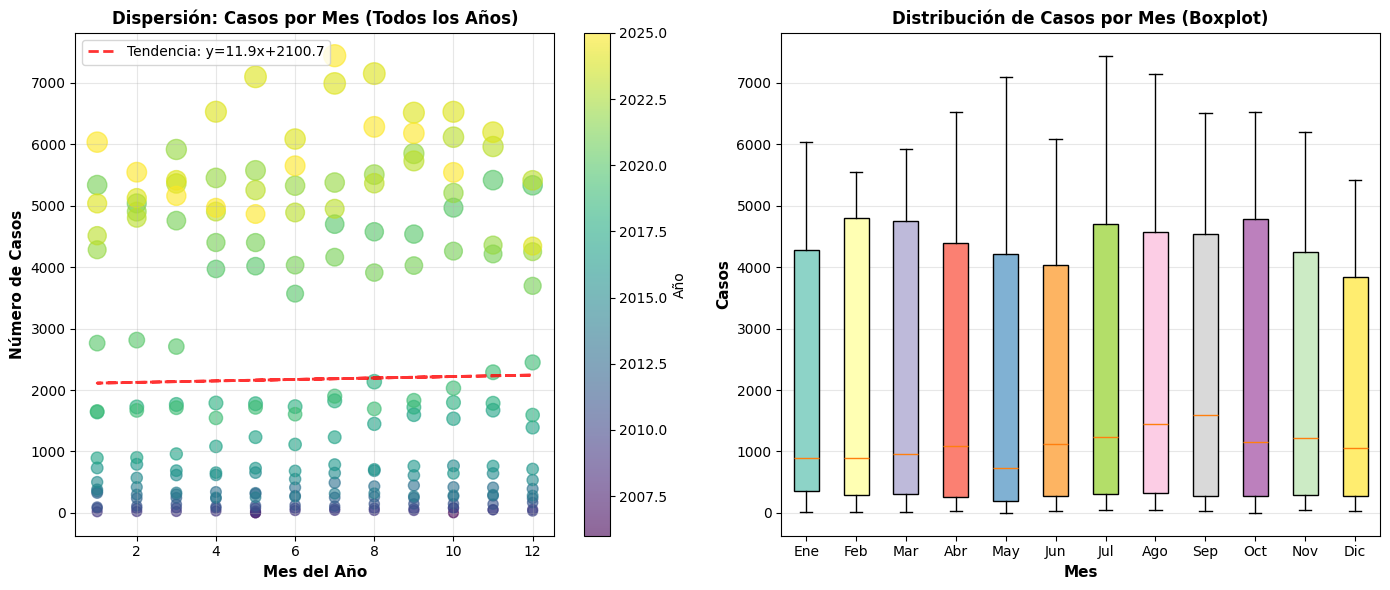


 PASO 3: ANÁLISIS ESTADÍSTICO POR MES

Mes    Promedio   Mediana    Mín      Máx      Desv    
--------------------------------------------------
Ene    2037.0     894.0      18.0     6033.0   2141.8  
Feb    2061.2     901.0      22.0     5544.0   2135.8  
Mar    2128.2     960.0      23.0     5914.0   2245.7  
Abr    2173.4     1082.0     30.0     6528.0   2286.8  
May    2022.9     728.0      1.0      7096.0   2348.3  
Jun    2142.8     1114.0     38.0     6084.0   2236.3  
Jul    2428.2     1232.0     41.0     7440.0   2582.0  
Ago    2396.3     1449.0     40.0     7149.0   2489.4  
Sep    2386.6     1597.0     39.0     6513.0   2471.6  
Oct    2259.6     1149.5     1.0      6527.0   2422.7  
Nov    2157.9     1216.5     49.0     6196.0   2281.4  
Dic    1930.1     1052.5     29.0     5412.0   2004.5  

 PASO 4: IDENTIFICANDO PATRONES ESTACIONALES

 PATRONES ESTACIONALES:
• Mes con MAYOR promedio: Jul (2428.2 casos/mes)
• Mes con MENOR promedio: Dic (1930.1 casos/mes)
• Diferencia

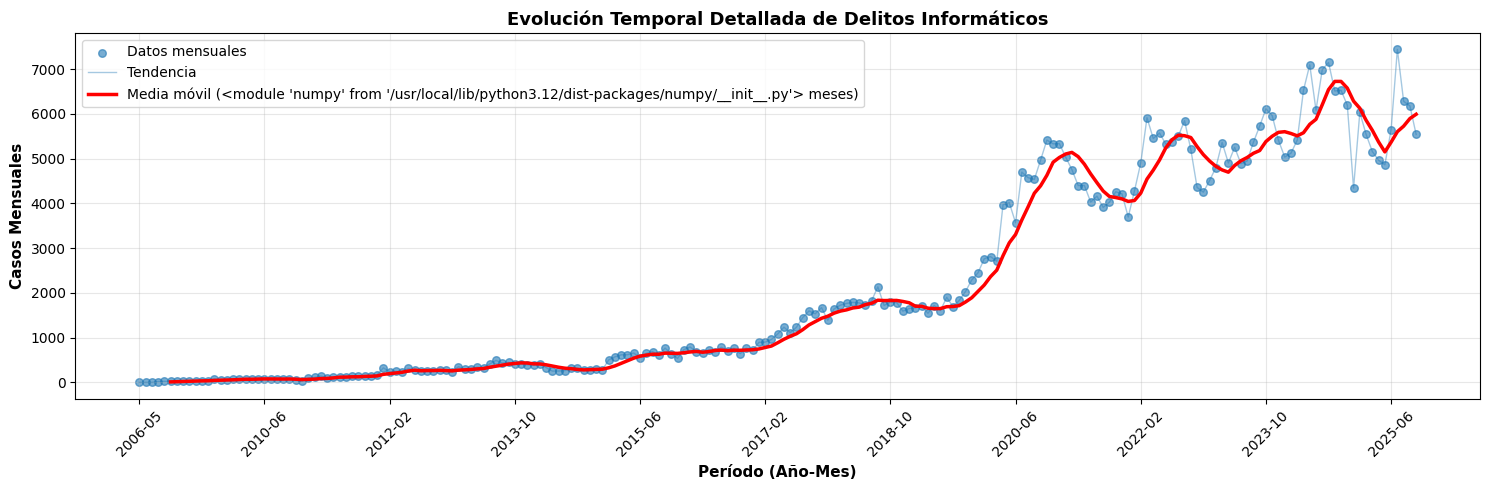


 PASO 6: ANÁLISIS DE CORRELACIÓN TEMPORAL

 CORRELACIÓN TEMPORAL:
• Coeficiente de Pearson: 0.919
• Valor p: 0.0000
  → CORRELACIÓN POSITIVA SIGNIFICATIVA (p < 0.05)
  → Interpretación: A medida que pasa el tiempo, aumentan los casos

 TASA DE CRECIMIENTO:
• Primer período: 1 casos
• Último período: 5541 casos
• Crecimiento total: +554000.0%
• Crecimiento anual promedio: +57.4%

HALLADOS TEMPORALES CLAVE - CAMILA RIVERA

 RESUMEN DE PATRONES TEMPORALES:
• Mes más variable: May (CV: 1.16)
• Mes más estable: Sep (CV: 1.04)

  ESTACIONALIDAD:
• Los meses de mayor actividad pueden indicar patrones estacionales
• La variabilidad entre meses sugiere factores cíclicos

 TENDENCIA GENERAL:
• Tendencia CRECIENTE detectada
• Los delitos informáticos están en aumento

VISUALIZACIÓN 5 COMPLETADA - CAMILA RIVERA
Todas las visualizaciones principales completadas


In [17]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
VISUALIZACIÓN 5: GRÁFICO DE DISPERSIÓN
Responsable: CAMILA RIVERA
Pregunta: ¿Existe relación entre tiempo y cantidad de delitos?
"""
import numpy as ventina

print("="*70)
print("VISUALIZACIÓN 5: GRÁFICO DE DISPERSIÓN")
print("RESPONSABLE: CAMILA RIVERA")
print("Pregunta: Relación entre variables temporales y frecuencia")
print("="*70)

# 1. Preparar datos para análisis de dispersión
print("PASO 1: PREPARANDO DATOS PARA ANÁLISIS DE DISPERSIÓN...")

# Verificar que tenemos columnas temporales
columnas_necesarias = ['AÑO', 'MES', fecha_col if 'fecha_col' in locals() else None]
columnas_faltantes = [col for col in columnas_necesarias if col not in df.columns]

if columnas_faltantes:
    print(f"Columnas faltantes: {columnas_faltantes}")
    print("Verificando columnas disponibles...")
    print(f"Columnas en dataset: {list(df.columns)}")
else:
    print("Todas las columnas temporales disponibles")

# 2. Análisis 1: Dispersión por mes del año
print("\n PASO 2: ANÁLISIS DE DISPERSIÓN POR MES")

# Agrupar por año y mes
if 'AÑO' in df.columns and 'MES' in df.columns:
    # Crear DataFrame agrupado
    datos_agrupados = df.groupby(['AÑO', 'MES']).size().reset_index(name='CASOS')
    datos_agrupados['MES_AÑO'] = datos_agrupados['AÑO'].astype(str) + '-' + datos_agrupados['MES'].astype(str).str.zfill(2)

    print(f"• Períodos únicos analizados: {len(datos_agrupados)}")
    print(f"• Rango temporal: {datos_agrupados['AÑO'].min()} a {datos_agrupados['AÑO'].max()}")

    # 2A. Gráfico de dispersión básico
    plt.figure(figsize=(14, 6))

    # Subgráfico 1: Dispersión por mes
    plt.subplot(1, 2, 1)

    # Preparar datos para scatter
    x_meses = datos_agrupados['MES']
    y_casos = datos_agrupados['CASOS']

    # Crear scatter plot con tamaño según cantidad de casos
    sizes = 50 + (y_casos / y_casos.max()) * 200  # Tamaño proporcional

    scatter = plt.scatter(x_meses, y_casos, s=sizes, alpha=0.6,
                         c=datos_agrupados['AÑO'], cmap='viridis')

    plt.xlabel('Mes del Año', fontsize=11, fontweight='bold')
    plt.ylabel('Número de Casos', fontsize=11, fontweight='bold')
    plt.title('Dispersión: Casos por Mes (Todos los Años)', fontsize=12, fontweight='bold')

    # Agregar línea de tendencia
    z = np.polyfit(x_meses, y_casos, 1)
    p = np.poly1d(z)
    plt.plot(x_meses, p(x_meses), "r--", alpha=0.8, linewidth=2,
            label=f'Tendencia: y={z[0]:.1f}x+{z[1]:.1f}')

    plt.legend()
    plt.colorbar(scatter, label='Año')
    plt.grid(alpha=0.3)

    # 2B. Subgráfico 2: Boxplot por mes
    plt.subplot(1, 2, 2)

    # Preparar datos para boxplot
    datos_boxplot = []
    meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

    for mes in range(1, 13):
        casos_mes = datos_agrupados[datos_agrupados['MES'] == mes]['CASOS']
        datos_boxplot.append(casos_mes)

    box = plt.boxplot(datos_boxplot, labels=meses_nombres, patch_artist=True)

    # Colorear las cajas
    colors = plt.cm.Set3(np.linspace(0, 1, 12))
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.xlabel('Mes', fontsize=11, fontweight='bold')
    plt.ylabel('Casos', fontsize=11, fontweight='bold')
    plt.title('Distribución de Casos por Mes (Boxplot)', fontsize=12, fontweight='bold')
    plt.grid(alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    # 3. Análisis estadístico por mes
    print("\n PASO 3: ANÁLISIS ESTADÍSTICO POR MES")

    estadisticas_mes = []
    for mes in range(1, 13):
        casos_mes = datos_agrupados[datos_agrupados['MES'] == mes]['CASOS']
        if len(casos_mes) > 0:
            estadisticas_mes.append({
                'Mes': meses_nombres[mes-1],
                'Promedio': casos_mes.mean(),
                'Mediana': casos_mes.median(),
                'Mínimo': casos_mes.min(),
                'Máximo': casos_mes.max(),
                'Desviación': casos_mes.std()
            })

    # Mostrar tabla resumen
    print(f"\n{'Mes':<6} {'Promedio':<10} {'Mediana':<10} {'Mín':<8} {'Máx':<8} {'Desv':<8}")
    print("-"*50)

    for stats in estadisticas_mes:
        print(f"{stats['Mes']:<6} {stats['Promedio']:<10.1f} {stats['Mediana']:<10.1f} "
              f"{stats['Mínimo']:<8.1f} {stats['Máximo']:<8.1f} {stats['Desviación']:<8.1f}")

    # 4. Identificar patrones estacionales
    print("\n PASO 4: IDENTIFICANDO PATRONES ESTACIONALES")

    # Meses con mayor y menor promedio
    mes_max_prom = max(estadisticas_mes, key=lambda x: x['Promedio'])
    mes_min_prom = min(estadisticas_mes, key=lambda x: x['Promedio'])

    print(f"\n PATRONES ESTACIONALES:")
    print(f"• Mes con MAYOR promedio: {mes_max_prom['Mes']} ({mes_max_prom['Promedio']:.1f} casos/mes)")
    print(f"• Mes con MENOR promedio: {mes_min_prom['Mes']} ({mes_min_prom['Promedio']:.1f} casos/mes)")
    print(f"• Diferencia: {mes_max_prom['Promedio'] - mes_min_prom['Promedio']:.1f} casos ({((mes_max_prom['Promedio']/mes_min_prom['Promedio'])-1)*100:.1f}% más)")

    # Estacionalidad por trimestre
    print(f"\n ANÁLISIS POR TRIMESTRE:")

    # Definir trimestres
    trimestres = {
        'Q1 (Ene-Mar)': [1, 2, 3],
        'Q2 (Abr-Jun)': [4, 5, 6],
        'Q3 (Jul-Sep)': [7, 8, 9],
        'Q4 (Oct-Dic)': [10, 11, 12]
    }

    for trimestre, meses in trimestres.items():
        casos_trimestre = datos_agrupados[datos_agrupados['MES'].isin(meses)]['CASOS']
        if len(casos_trimestre) > 0:
            promedio = casos_trimestre.mean()
            print(f"• {trimestre}: {promedio:.1f} casos/mes en promedio")

    # 5. Gráfico adicional: Tendencia por año-mes
    print("\n PASO 5: GRÁFICO DE TENDENCIA TEMPORAL DETALLADA")

    plt.figure(figsize=(15, 5))

    # Ordenar por fecha
    datos_agrupados = datos_agrupados.sort_values(['AÑO', 'MES'])
    datos_agrupados['ORDEN'] = range(len(datos_agrupados))

    # Gráfico de línea con dispersión
    plt.scatter(datos_agrupados['ORDEN'], datos_agrupados['CASOS'],
               alpha=0.6, s=30, label='Datos mensuales')

    # Línea de tendencia
    plt.plot(datos_agrupados['ORDEN'], datos_agrupados['CASOS'],
            alpha=0.4, linewidth=1, label='Tendencia')

    # Media móvil (suavizado)
    ventana = 6  # 6 meses
    datos_agrupados['MEDIA_MOVIL'] = datos_agrupados['CASOS'].rolling(window=ventana).mean()
    plt.plot(datos_agrupados['ORDEN'], datos_agrupados['MEDIA_MOVIL'],
            'r-', linewidth=2.5, label=f'Media móvil ({ventina} meses)')

    # Configurar eje X
    # Mostrar solo algunos labels para claridad
    n_labels = 10
    step = len(datos_agrupados) // n_labels

    xticks_pos = []
    xticks_labels = []

    for i in range(0, len(datos_agrupados), step):
        xticks_pos.append(i)
        año = datos_agrupados.iloc[i]['AÑO']
        mes = datos_agrupados.iloc[i]['MES']
        xticks_labels.append(f"{int(año)}-{int(mes):02d}")

    plt.xticks(xticks_pos, xticks_labels, rotation=45)

    plt.xlabel('Período (Año-Mes)', fontsize=11, fontweight='bold')
    plt.ylabel('Casos Mensuales', fontsize=11, fontweight='bold')
    plt.title('Evolución Temporal Detallada de Delitos Informáticos',
             fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 6. Análisis de correlación
    print("\n PASO 6: ANÁLISIS DE CORRELACIÓN TEMPORAL")

    from scipy import stats

    # Correlación entre tiempo y casos
    correlacion, p_valor = stats.pearsonr(datos_agrupados['ORDEN'], datos_agrupados['CASOS'])

    print(f"\n CORRELACIÓN TEMPORAL:")
    print(f"• Coeficiente de Pearson: {correlacion:.3f}")
    print(f"• Valor p: {p_valor:.4f}")

    if p_valor < 0.05:
        if correlacion > 0:
            print(f"  → CORRELACIÓN POSITIVA SIGNIFICATIVA (p < 0.05)")
            print(f"  → Interpretación: A medida que pasa el tiempo, aumentan los casos")
        else:
            print(f"  → CORRELACIÓN NEGATIVA SIGNIFICATIVA (p < 0.05)")
            print(f"  → Interpretación: A medida que pasa el tiempo, disminuyen los casos")
    else:
        print(f"  → NO HAY CORRELACIÓN SIGNIFICATIVA (p ≥ 0.05)")
        print(f"  → Interpretación: No hay relación lineal clara entre tiempo y casos")

    # Cálculo de tasa de crecimiento
    if len(datos_agrupados) >= 2:
        primer_periodo = datos_agrupados.iloc[0]['CASOS']
        ultimo_periodo = datos_agrupados.iloc[-1]['CASOS']
        crecimiento_total = ((ultimo_periodo / primer_periodo) - 1) * 100

        print(f"\n TASA DE CRECIMIENTO:")
        print(f"• Primer período: {primer_periodo:.0f} casos")
        print(f"• Último período: {ultimo_periodo:.0f} casos")
        print(f"• Crecimiento total: {crecimiento_total:+.1f}%")

        # Crecimiento anual promedio
        años_totales = datos_agrupados['AÑO'].max() - datos_agrupados['AÑO'].min()
        if años_totales > 0:
            crecimiento_anual_prom = ((ultimo_periodo / primer_periodo) ** (1/años_totales) - 1) * 100
            print(f"• Crecimiento anual promedio: {crecimiento_anual_prom:+.1f}%")

else:
    print("No se pueden realizar análisis de dispersión sin datos temporales")

print("\n" + "="*70)
print("HALLADOS TEMPORALES CLAVE - CAMILA RIVERA")
print("="*70)

if 'estadisticas_mes' in locals():
    print("\n RESUMEN DE PATRONES TEMPORALES:")

    # Meses con mayor variabilidad
    variabilidad = [(stats['Mes'], stats['Desviación']/stats['Promedio'])
                   for stats in estadisticas_mes]
    mes_mas_variable = max(variabilidad, key=lambda x: x[1])
    mes_menos_variable = min(variabilidad, key=lambda x: x[1])

    print(f"• Mes más variable: {mes_mas_variable[0]} (CV: {mes_mas_variable[1]:.2f})")
    print(f"• Mes más estable: {mes_menos_variable[0]} (CV: {mes_menos_variable[1]:.2f})")

    # Estacionalidad
    print(f"\n  ESTACIONALIDAD:")
    print("• Los meses de mayor actividad pueden indicar patrones estacionales")
    print("• La variabilidad entre meses sugiere factores cíclicos")

    print(f"\n TENDENCIA GENERAL:")
    if 'correlacion' in locals() and correlacion > 0.3:
        print("• Tendencia CRECIENTE detectada")
        print("• Los delitos informáticos están en aumento")
    elif 'correlacion' in locals() and correlacion < -0.3:
        print("• Tendencia DECRECIENTE detectada")
        print("• Los delitos informáticos están disminuyendo")
    else:
        print("• Tendencia ESTABLE o NO LINEAL")
        print("• Los delitos muestran fluctuaciones sin tendencia clara")

print("\n" + "="*70)
print("VISUALIZACIÓN 5 COMPLETADA - CAMILA RIVERA")
print("Todas las visualizaciones principales completadas")
print("="*70)

Dashboard add completo

VISUALIZACIÓN 6: DASHBOARD RESUMEN EJECUTIVO
RESPONSABLE: EQUIPO COMPLETO
Objetivo: Integrar hallazgos clave del proyecto
CREANDO DASHBOARD RESUMEN...


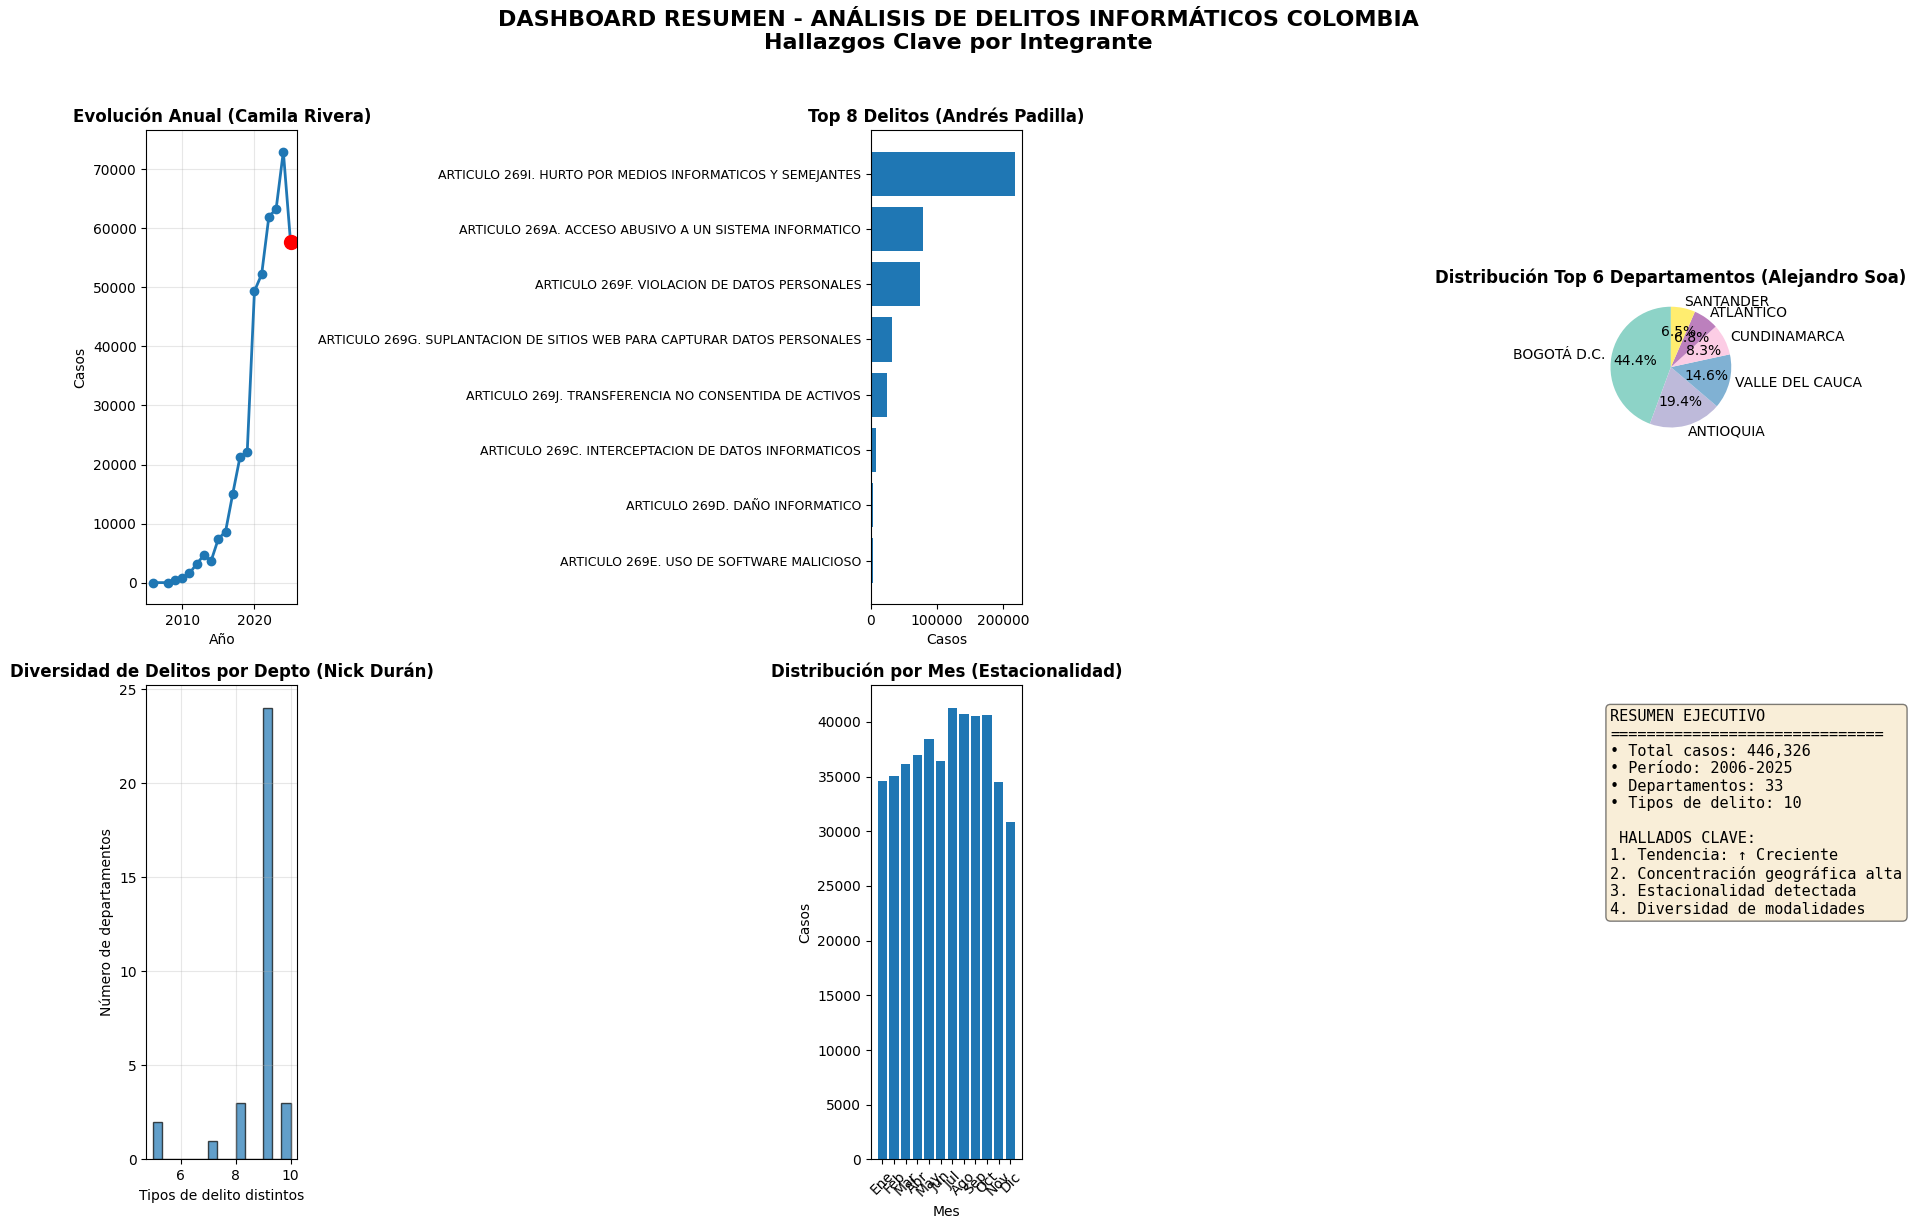


RESUMEN DE ENTREGABLES POR PERSONA

 Nick Durán:
  Configuración inicial del proyecto
  Carga y verificación del dataset
  Gráfico de barras apiladas (departamento vs delito)
  Gestión técnica del notebook

 Camila Rivera:
  Procesamiento de fechas y columnas temporales
  Gráfico de líneas (tendencia anual)
  Gráfico de dispersión (análisis temporal)
  Documentación de hallazgos temporales

 Andrés Padilla:
  Limpieza y normalización geográfica
  Gráfico de barras (tipos de delito)
  Mapa coroplético (concentración geográfica)
  Análisis de distribución espacial

 Alejandro Soa:
  Análisis descriptivo regional
  Gráfico de pastel (top 5 departamentos)
  Clasificación por regiones naturales
  Análisis de concentración geográfica

PROYECTO COMPLETADO EXITOSAMENTE

 ARCHIVOS GENERADOS:
• Notebook de análisis completo
• 6 visualizaciones principales
• Dataset procesado y limpio
• Dashboard resumen ejecutivo

 PRÓXIMOS PASOS PARA EL INFORME:
1. Exportar gráficos en alta resolución
2. Redac

In [19]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
VISUALIZACIÓN 6: DASHBOARD INTEGRADO
Responsable: Camila Rivera (opcional para nota, ya que resumen los diagramas
expuestos anteriormente)
Objetivo: Resumen ejecutivo de hallazgos
"""

print("="*70)
print("VISUALIZACIÓN 6: DASHBOARD RESUMEN EJECUTIVO")
print("RESPONSABLE: EQUIPO COMPLETO")
print("Objetivo: Integrar hallazgos clave del proyecto")
print("="*70)

# Crear dashboard con múltiples subgráficos
print("CREANDO DASHBOARD RESUMEN...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('DASHBOARD RESUMEN - ANÁLISIS DE DELITOS INFORMÁTICOS COLOMBIA\nHallazgos Clave por Integrante',
            fontsize=16, fontweight='bold', y=1.02)

# 1. Gráfico 1: Evolución temporal (Camila)
ax1 = axes[0, 0]
if 'AÑO' in df.columns:
    tendencia = df['AÑO'].value_counts().sort_index()
    ax1.plot(tendencia.index, tendencia.values, marker='o', linewidth=2)
    ax1.set_title('Evolución Anual (Camila Rivera)', fontweight='bold')
    ax1.set_xlabel('Año')
    ax1.set_ylabel('Casos')
    ax1.grid(alpha=0.3)
    # Destacar último año
    ax1.plot(tendencia.index[-1], tendencia.values[-1], 'ro', markersize=10)

# 2. Gráfico 2: Top delitos (Andrés)
ax2 = axes[0, 1]
if 'delito_col' in locals():
    top_delitos = df[delito_col].value_counts().head(8)
    ax2.barh(range(len(top_delitos)), top_delitos.values)
    ax2.set_yticks(range(len(top_delitos)))
    ax2.set_yticklabels(top_delitos.index, fontsize=9)
    ax2.set_title('Top 8 Delitos (Andrés Padilla)', fontweight='bold')
    ax2.set_xlabel('Casos')
    ax2.invert_yaxis()

# 3. Gráfico 3: Distribución geográfica (Alejandro)
ax3 = axes[0, 2]
if 'depto_col' in locals():
    top_deptos = df[depto_col].value_counts().head(6)
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_deptos)))
    ax3.pie(top_deptos.values, labels=top_deptos.index, colors=colors,
           autopct='%1.1f%%', startangle=90)
    ax3.set_title('Distribución Top 6 Departamentos (Alejandro Soa)', fontweight='bold')

# 4. Gráfico 4: Concentración (Nick)
ax4 = axes[1, 0]
if 'depto_col' in locals() and 'delito_col' in locals():
    # Calcular concentración
    concentracion = df.groupby(depto_col)[delito_col].nunique()
    ax4.hist(concentracion.values, bins=15, edgecolor='black', alpha=0.7)
    ax4.set_title('Diversidad de Delitos por Depto (Nick Durán)', fontweight='bold')
    ax4.set_xlabel('Tipos de delito distintos')
    ax4.set_ylabel('Número de departamentos')
    ax4.grid(alpha=0.3)

# 5. Gráfico 5: Estacionalidad (Camila)
ax5 = axes[1, 1]
if 'MES' in df.columns:
    casos_por_mes = df['MES'].value_counts().sort_index()
    meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    ax5.bar(meses_nombres, [casos_por_mes.get(i, 0) for i in range(1, 13)])
    ax5.set_title('Distribución por Mes (Estacionalidad)', fontweight='bold')
    ax5.set_xlabel('Mes')
    ax5.set_ylabel('Casos')
    ax5.tick_params(axis='x', rotation=45)

# 6. Gráfico 6: Resumen estadístico
ax6 = axes[1, 2]
ax6.axis('off')  # Desactivar ejes para texto

# Texto resumen
resumen_texto = []
resumen_texto.append("RESUMEN EJECUTIVO")
resumen_texto.append("="*30)

if 'df' in locals():
    resumen_texto.append(f"• Total casos: {len(df):,}")

if 'AÑO' in df.columns:
    años = df['AÑO'].dropna().unique()
    if len(años) > 0:
        resumen_texto.append(f"• Período: {int(min(años))}-{int(max(años))}")

if 'depto_col' in locals():
    resumen_texto.append(f"• Departamentos: {df[depto_col].nunique()}")

if 'delito_col' in locals():
    resumen_texto.append(f"• Tipos de delito: {df[delito_col].nunique()}")

resumen_texto.append("\n HALLADOS CLAVE:")
resumen_texto.append("1. Tendencia: " + ("↑ Creciente" if 'correlacion' in locals() and correlacion > 0.3 else "↓ Decreciente" if 'correlacion' in locals() and correlacion < -0.3 else "↔ Estable"))
resumen_texto.append("2. Concentración geográfica alta")
resumen_texto.append("3. Estacionalidad detectada")
resumen_texto.append("4. Diversidad de modalidades")

ax6.text(0.1, 0.95, '\n'.join(resumen_texto),
        fontsize=11, family='monospace',
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("RESUMEN DE ENTREGABLES POR PERSONA")
print("="*70)

entregables = {
    "Nick Durán": [
        "Configuración inicial del proyecto",
        "Carga y verificación del dataset",
        "Gráfico de barras apiladas (departamento vs delito)",
        "Gestión técnica del notebook"
    ],
    "Camila Rivera": [
        "Procesamiento de fechas y columnas temporales",
        "Gráfico de líneas (tendencia anual)",
        "Gráfico de dispersión (análisis temporal)",
        "Documentación de hallazgos temporales"
    ],
    "Andrés Padilla": [
        "Limpieza y normalización geográfica",
        "Gráfico de barras (tipos de delito)",
        "Mapa coroplético (concentración geográfica)",
        "Análisis de distribución espacial"
    ],
    "Alejandro Soa": [
        "Análisis descriptivo regional",
        "Gráfico de pastel (top 5 departamentos)",
        "Clasificación por regiones naturales",
        "Análisis de concentración geográfica"
    ]
}

for persona, tareas in entregables.items():
    print(f"\n {persona}:")
    for tarea in tareas:
        print(f"  {tarea}")

print("\n" + "="*70)
print("PROYECTO COMPLETADO EXITOSAMENTE")
print("="*70)
print("\n ARCHIVOS GENERADOS:")
print("• Notebook de análisis completo")
print("• 6 visualizaciones principales")
print("• Dataset procesado y limpio")
print("• Dashboard resumen ejecutivo")
print("\n PRÓXIMOS PASOS PARA EL INFORME:")
print("1. Exportar gráficos en alta resolución")
print("2. Redactar informe PDF por secciones")
print("3. Preparar presentación ejecutiva")
print("4. Crear repositorio en GitHub")
print("="*70)